<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Открытие-и-анализ-данных" data-toc-modified-id="Открытие-и-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открытие и анализ данных</a></span></li><li><span><a href="#Подготовка-текста" data-toc-modified-id="Подготовка-текста-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка текста</a></span><ul class="toc-item"><li><span><a href="#Лемматизация-с-Post-тегами" data-toc-modified-id="Лемматизация-с-Post-тегами-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Лемматизация с Post-тегами</a></span></li><li><span><a href="#Очистка-текста-и-лемматизация" data-toc-modified-id="Очистка-текста-и-лемматизация-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Очистка текста и лемматизация</a></span></li></ul></li><li><span><a href="#Выборки-для-моделей" data-toc-modified-id="Выборки-для-моделей-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выборки для моделей</a></span></li><li><span><a href="#Векторизация" data-toc-modified-id="Векторизация-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Векторизация</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LogisticRegression+GridSearch" data-toc-modified-id="LogisticRegression+GridSearch-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression+GridSearch</a></span></li><li><span><a href="#RandomForest+Optuna" data-toc-modified-id="RandomForest+Optuna-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForest+Optuna</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сравнение моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.dummy import DummyClassifier
import optuna


import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import stopwords


pd.set_option('display.max_colwidth', 1000)
import warnings
warnings.filterwarnings("ignore")

### Открытие и анализ данных

In [2]:
try:
    data=pd.read_csv(r'C:\data\toxic_comments.csv')
    pd.set_option('display.max_columns', None) 
except:
    data=pd.read_csv('/datasets/toxic_comments.csv')
    pd.set_option('display.max_columns', None)
    

In [3]:

class Preprocessing ():
    def __init__(self, data):
        self.data = data
                
    def evaluation(self): #Общая информация о таблице: статистика, пропуски, дубликаты и т.д.
        information=(display('ИНФОРМАЦИЯ О ДАННЫХ',data.head(10)), display(data.info()), display('СТАТИСТИКА',data.describe()), display(data.describe(include=['object', 'bool'])), display('ЗАВИСИМОСТЬ ПРИЗНАКОВ',data.corr()), display('ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ',data.isna().mean()*100), display('ДУБЛИКАТЫ',data.duplicated().sum()))
        
    def processing(self):#удаление пропущенных значений, дубликатов
        data1=data.copy()
        miss=data1.isna().sum().count()
        if miss>0:
            for col in data1.columns:
                try:
                    data1[col] = data1[col].fillna("Unknown")
                except:
                    data1[col] = data1[col].fillna(np.mean(data1[col]))
            display('Пропуски удалены:', data1.isna().sum())
                                  
        drop = data1.duplicated().sum()
        if drop>0:
            data1=data1.drop_duplicates() 
            drop1=data1.duplicated().sum()
            display('дубликаты удалены, осталось:', drop1)
                            
       
                
        
    def visual_box(self):# Визуализация выбросов с учёном удалённых пропусков и дубликатов    
        data1=data.copy()
        miss=data1.isna().sum().count()
        if miss>0:
            for col in data1.columns:
                try:
                    data1[col] = data1[col].fillna("Unknown")
                except:
                    data1[col] = data1[col].fillna(np.mean(data1[col]))
                                        
        drop = data1.duplicated().sum()
        if drop>0:
            data1=data1.drop_duplicates() 
            drop1=data1.duplicated().sum()
        sb.set(rc = {'figure.figsize':(15,15)})
        return sb.boxplot(data=data1)

In [4]:
if __name__ == "__main__":
    proect = Preprocessing(data)

In [5]:
proect.evaluation()
proect.processing()

'ИНФОРМАЦИЯ О ДАННЫХ'

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0
5,"""\n\nCongratulations from me as well, use the tools well. · talk """,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0
8,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0
9,alignment on this subject and which are contrary to those of DuLithgow,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


None

'СТАТИСТИКА'

,toxic
count,159571.000000
mean,0.101679
std,0.302226
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,text
count,159571
unique,159571
top,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
freq,1


'ЗАВИСИМОСТЬ ПРИЗНАКОВ'

,toxic
toxic,1.0


'ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ'

text     0.0
toxic    0.0
dtype: float64

'ДУБЛИКАТЫ'

0

'Пропуски удалены:'

text     0
toxic    0
dtype: int64

### Подготовка текста

In [6]:
corpus = data['text'].values

#### Лемматизация с Post-тегами

In [7]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def wordnet (word):
    tag=nltk.pos_tag([word])[0][1][0].upper()
    tag_dict={"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "v": wordnet.VERB,
              "R": wordnet.AVD}
    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AcerUser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AcerUser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AcerUser\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Очистка текста и лемматизация

In [8]:
lemmatizer = WordNetLemmatizer()
def clear_text(text):
    pattern = re.sub(r'[^a-zA-Z]', ' ', text)
    clear = pattern.split()
    lemm = []
    for i in range(len(clear)):
        lemm.append(lemmatizer.lemmatize(clear[i].lower()))
    return " ".join(lemm)

In [9]:
for i in tqdm(range(len(corpus))):
    corpus[i] = clear_text(corpus[i])

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [02:35<00:00, 1027.37it/s]


In [10]:
data_corpus = pd.DataFrame(corpus)
data['clear_text'] = data_corpus[0]
data.head()

,text,toxic,clear_text
0,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalism just closure on some gas after i voted at new york doll fac and please don t remove the template from the talk page since i m retired now,0,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalism just closure on some gas after i voted at new york doll fac and please don t remove the template from the talk page since i m retired now
1,d aww he match this background colour i m seemingly stuck with thanks talk january utc,0,d aww he match this background colour i m seemingly stuck with thanks talk january utc
2,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info
3,more i can t make any real suggestion on improvement i wondered if the section statistic should be later on or a subsection of type of accident i think the reference may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else doe first if you have any preference for formatting style on reference or want to do it yourself please let me know there appears to be a backlog on article for review so i guess there may be a delay until a reviewer turn up it s listed in the relevant form eg wikipedia good article nomination transport,0,more i can t make any real suggestion on improvement i wondered if the section statistic should be later on or a subsection of type of accident i think the reference may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else doe first if you have any preference for formatting style on reference or want to do it yourself please let me know there appears to be a backlog on article for review so i guess there may be a delay until a reviewer turn up it s listed in the relevant form eg wikipedia good article nomination transport
4,you sir are my hero any chance you remember what page that s on,0,you sir are my hero any chance you remember what page that s on


Text(0, 0.5, 'Количество ответов')

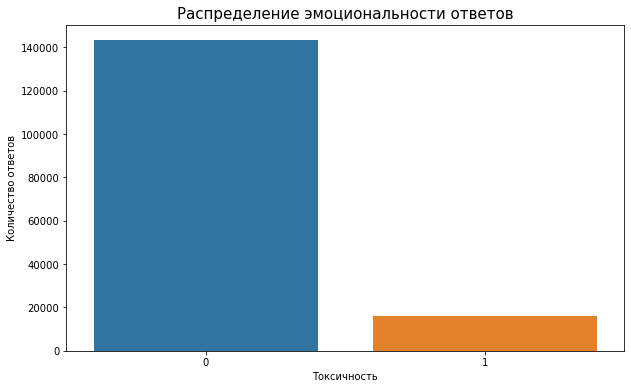

In [11]:
plt.figure(figsize=(10, 6))
sb.countplot(x='toxic', data=data)
plt.title('Распределение эмоциональности ответов', fontsize=15)
plt.xlabel('Токсичность')
plt.ylabel('Количество ответов')

### Выборки для моделей

In [12]:
features = data['clear_text']
target = data['toxic']

'Размер признаков:', features.shape, 'размер целевого признака:', target.shape

('Размер признаков:', (159571,), 'размер целевого признака:', (159571,))

In [13]:
features_train1, features_test1, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345, stratify = target)
'Размеры выборок: обучающие фичи-', features_train1.shape, 'тестовые фичи -', features_test1.shape, 'целевой признак обучающей выборки-',target_train.shape, 'целевой признак тестовой выборки-',target_test.shape  

('Размеры выборок: обучающие фичи-',
 (119678,),
 'тестовые фичи -',
 (39893,),
 'целевой признак обучающей выборки-',
 (119678,),
 'целевой признак тестовой выборки-',
 (39893,))

### Векторизация

In [14]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stopwords) 

features_train = count_tf_idf.fit_transform(features_train1)
features_test = count_tf_idf.transform(features_test1)


'Размеры выборок: обучающие фичи-', features_train.shape, 'тестовые фичи -', features_test.shape, 'целевой признак обучающей выборки-',target_train.shape, 'целевой признак тестовой выборки-',target_test.shape  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AcerUser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


('Размеры выборок: обучающие фичи-',
 (119678, 133120),
 'тестовые фичи -',
 (39893, 133120),
 'целевой признак обучающей выборки-',
 (119678,),
 'целевой признак тестовой выборки-',
 (39893,))

### Промежуточный вывод

Исходные данные с комментариями были лемматизированы, очищены от специальных символов, приведены к нижнему регистру.<br>
Подготовленный текс был разбит на выбоки, кроме того из него были удалны стоп-слова и проведена векторизация (перевод текста в матрицу).<br>
Отдельно оставлены категориальные признаки для работы CatBoost

## Обучение моделей

In [15]:
# функия для расчёта метрики
def f_1 (target, prediction):
    return f1_score(target, prediction)

In [16]:
# Для добавления метрик в таблицу c результатами работы моделей
def metrics(result_train, result_test, model, data):
    data.loc[model, 'F1_train'] = result_train
    data.loc[model, 'F1_test'] = result_test
    return data

In [17]:
# Таблица для сравнения результатов работы моделей
compare_models = pd.DataFrame(columns=['F1_train', 'F1_test'])

In [18]:
score = make_scorer(f_1,greater_is_better=False)

### LogisticRegression

In [19]:
model_log=LogisticRegression(class_weight='balanced', random_state=12345)
model_log.fit(features_train, target_train)
predict_log_train=model_log.predict(features_train)
predict_log_test=model_log.predict(features_test)

result_log_train = f_1(target_train, predict_log_train)
result_log_test = f_1(target_test, predict_log_test)

'F1 на тренировочной выборке:', result_log_train, 'F1 на тестовой выборке:',  result_log_test


('F1 на тренировочной выборке:',
 0.8308346624136097,
 'F1 на тестовой выборке:',
 0.7583936800526663)

In [20]:
metrics(result_log_train, result_log_test, 'LogisticRegression', compare_models)

,F1_train,F1_test
LogisticRegression,0.830835,0.758394


### LogisticRegression+GridSearch

In [21]:
regression = LogisticRegression(fit_intercept=True, 
                                class_weight='balanced', 
                                random_state=12345,
                                solver='liblinear'
                               )
regression_parametrs = {'C': [-5, 7, 50]}

model_log_grid = GridSearchCV(regression, regression_parametrs, scoring=score)
model_log_grid.fit(features_train, target_train)


'лучшие параметры:', model_log_grid.best_params_

('лучшие параметры:', {'C': 50})

In [22]:
# Обучение на лучших параметрах
regression = LogisticRegression(fit_intercept=True, 
                                class_weight='balanced', 
                                random_state=12345,
                                solver='liblinear'
                               )

regression_parametrs = {'C': [7]}
model_log_grid = GridSearchCV(regression,regression_parametrs, scoring=score)
model_log_grid.fit(features_train, target_train)

predict_log_grid_train=model_log_grid.predict(features_train)
predict_log_grid_test=model_log_grid.predict(features_test)

result_log_grid_train = f_1(target_train, predict_log_grid_train)
result_log_grid_test = model_log_grid.best_score_*-1

'F1 на тренировочной выборке:', result_log_grid_train, 'F1 на тестовой выборке:',  result_log_grid_test

('F1 на тренировочной выборке:',
 0.8994492408454898,
 'F1 на тестовой выборке:',
 0.7611964960992651)

In [23]:
metrics(result_log_grid_train, result_log_grid_test, 'LogisticRegression+GridSearch', compare_models)

,F1_train,F1_test
LogisticRegression,0.830835,0.758394
LogisticRegression+GridSearch,0.899449,0.761196


### RandomForest+Optuna

In [24]:
def objective(trial):
    
    model_forest = RandomForestClassifier(
                class_weight='balanced',
                n_estimators = trial.suggest_int("n_estimators", 10, 1000),
                max_depth = trial.suggest_int("max_depth", 1, 10),
                n_jobs = 4,
                random_state = 12345
           )
           
    optuna_forest=model_forest.fit(features_train, target_train)
    
    predict_optuna_test=optuna_forest.predict(features_test)
    score=f_1(target_test, predict_optuna_test)
              
    return score

In [25]:
study = optuna.create_study(study_name='RandomForest', direction="maximize")
study.optimize(objective, n_trials=100)

study.best_params

[I 2022-05-29 21:37:43,845] A new study created in memory with name: RandomForest
[I 2022-05-29 21:38:19,713] Trial 0 finished with value: 0.3846028557467832 and parameters: {'n_estimators': 703, 'max_depth': 7}. Best is trial 0 with value: 0.3846028557467832.
[I 2022-05-29 21:38:54,714] Trial 1 finished with value: 0.3642868094240302 and parameters: {'n_estimators': 941, 'max_depth': 4}. Best is trial 0 with value: 0.3846028557467832.
[I 2022-05-29 21:39:22,863] Trial 2 finished with value: 0.38185562540646 and parameters: {'n_estimators': 521, 'max_depth': 8}. Best is trial 0 with value: 0.3846028557467832.
[I 2022-05-29 21:39:40,395] Trial 3 finished with value: 0.3669354838709677 and parameters: {'n_estimators': 467, 'max_depth': 4}. Best is trial 0 with value: 0.3846028557467832.
[I 2022-05-29 21:40:00,243] Trial 4 finished with value: 0.38350921318825526 and parameters: {'n_estimators': 327, 'max_depth': 9}. Best is trial 0 with value: 0.3846028557467832.
[I 2022-05-29 21:40:17,9

{'n_estimators': 84, 'max_depth': 8}

In [26]:
optuna_params = study.best_params
model_optuna = RandomForestClassifier(**optuna_params)
forest=model_optuna.fit(features_train, target_train)
predict_optuna_train=forest.predict(features_train)
predict_optuna_test=forest.predict(features_test)

In [27]:
result_forest=study.best_value
result_forest_train=f_1(target_train, predict_optuna_train)

'F1 на тренировочной выборке:', result_forest_train, 'F1 на тестовой выборке:',  result_forest

('F1 на тренировочной выборке:',
 0.0,
 'F1 на тестовой выборке:',
 0.4322437321485243)

In [28]:
metrics(result_forest_train, result_forest, 'RandomForest+Optuna',compare_models)

,F1_train,F1_test
LogisticRegression,0.830835,0.758394
LogisticRegression+GridSearch,0.899449,0.761196
RandomForest+Optuna,0.0,0.432244


### CatBoost

*Для работы CatBoost возму признаки до векторизации. Модели градиентного бустинга с перебором параметров работают очень долго (даже с optuna), поэтому немного поэксперементировав, решила исполтзовать модели на дефолтных настройках*

In [29]:
cat = CatBoostClassifier(random_state = 12345)
cat.fit(pd.DataFrame(features_train1), target_train, text_features=['clear_text'], verbose=100)
pred_cat_train=cat.predict(pd.DataFrame(features_train1))
pred_cat_test=cat.predict(pd.DataFrame(features_test1))

result_cat_train=f_1(target_train, pred_cat_train)
result_cat_test=f_1(target_test, pred_cat_test)

'F1 на тренировочной выборке:', result_cat_train, 'F1 на тестовой выборке:',  result_cat_test

Learning rate set to 0.079478
0:	learn: 0.5904229	total: 711ms	remaining: 11m 50s
100:	learn: 0.1255537	total: 1m 4s	remaining: 9m 32s
200:	learn: 0.1153856	total: 2m 7s	remaining: 8m 26s
300:	learn: 0.1094020	total: 3m 9s	remaining: 7m 19s
400:	learn: 0.1050144	total: 4m 10s	remaining: 6m 13s
500:	learn: 0.1013081	total: 5m 11s	remaining: 5m 10s
600:	learn: 0.0981457	total: 6m 13s	remaining: 4m 7s
700:	learn: 0.0954536	total: 7m 14s	remaining: 3m 5s
800:	learn: 0.0932880	total: 8m 13s	remaining: 2m 2s
900:	learn: 0.0911671	total: 9m 14s	remaining: 1m
999:	learn: 0.0891729	total: 10m 13s	remaining: 0us


('F1 на тренировочной выборке:',
 0.8512477718360071,
 'F1 на тестовой выборке:',
 0.7841421736158578)

In [30]:
metrics(result_cat_train, result_cat_test, 'CatBoostClassifier',compare_models)

,F1_train,F1_test
LogisticRegression,0.830835,0.758394
LogisticRegression+GridSearch,0.899449,0.761196
RandomForest+Optuna,0.0,0.432244
CatBoostClassifier,0.851248,0.784142


### LGBM

In [31]:
lgbm = LGBMClassifier(random_state=12345)
lgbm.fit(features_train, target_train, verbose=100)
pred_lgbm_train=lgbm.predict(features_train)
pred_lgbm_test=lgbm.predict(features_test)

result_lgbm_train=f_1(target_train, pred_lgbm_train)
result_lgbm_test=f_1(target_test, pred_lgbm_test)

'F1 на тренировочной выборке:', result_lgbm_train, 'F1 на тестовой выборке:',  result_lgbm_test

('F1 на тренировочной выборке:',
 0.7814727977415188,
 'F1 на тестовой выборке:',
 0.744927536231884)

In [32]:
metrics(result_lgbm_train, result_lgbm_test, 'LGBMClassifier',compare_models)

,F1_train,F1_test
LogisticRegression,0.830835,0.758394
LogisticRegression+GridSearch,0.899449,0.761196
RandomForest+Optuna,0.0,0.432244
CatBoostClassifier,0.851248,0.784142
LGBMClassifier,0.781473,0.744928


### Проверка моделей на адекватность

In [33]:
dummy = DummyClassifier(strategy='constant', random_state=None, constant=1)

dummy.fit(features_train, target_train)


predicted_dummy_train = dummy.predict(features_train)
predicted_dummy = dummy.predict(features_test)


result_dummy_train=f_1(target_train, predicted_dummy_train)
result_dummy=f_1(target_test, predicted_dummy)

'F1 базовой модели для тренировочной выборки ', result_dummy_train, ',F1 базовой модели для тестовой выборки', result_dummy

('F1 базовой модели для тренировочной выборки ',
 0.18459274765447828,
 ',F1 базовой модели для тестовой выборки',
 0.18457757855696372)

In [34]:
metrics(result_dummy_train, result_dummy, 'DummyClassifer',compare_models)

,F1_train,F1_test
LogisticRegression,0.830835,0.758394
LogisticRegression+GridSearch,0.899449,0.761196
RandomForest+Optuna,0.0,0.432244
CatBoostClassifier,0.851248,0.784142
LGBMClassifier,0.781473,0.744928
DummyClassifer,0.184593,0.184578


### Промежуточный вывод

 Для классификации комментариев на позитивные и негативные были обучены модели логистической регрессии, случайного леса, CatBoost и LGBM. Модели градиентного бустинга с перебором параметров работали очень долго, поэтому были обучены на настройках "по умочанию". CatBoost гораздо быстрее работает на категориальных даных без векторизации.<br>
 Поэксперементировав с разными моделями и подбором параметров, оставила только некоторые в модели и параметры в текущем виде.<br>
 Проверку на адекватность прошли все модели, значит они работаю корректно.

## Сравнение моделей

In [35]:
compare_models=compare_models.sort_values(by='F1_test', ascending=False).reset_index()
compare_models

,index,F1_train,F1_test
0,CatBoostClassifier,0.851248,0.784142
1,LogisticRegression+GridSearch,0.899449,0.761196
2,LogisticRegression,0.830835,0.758394
3,LGBMClassifier,0.781473,0.744928
4,RandomForest+Optuna,0.0,0.432244
5,DummyClassifer,0.184593,0.184578


Text(0.5, 0.98, 'Сравнение качества моделей')

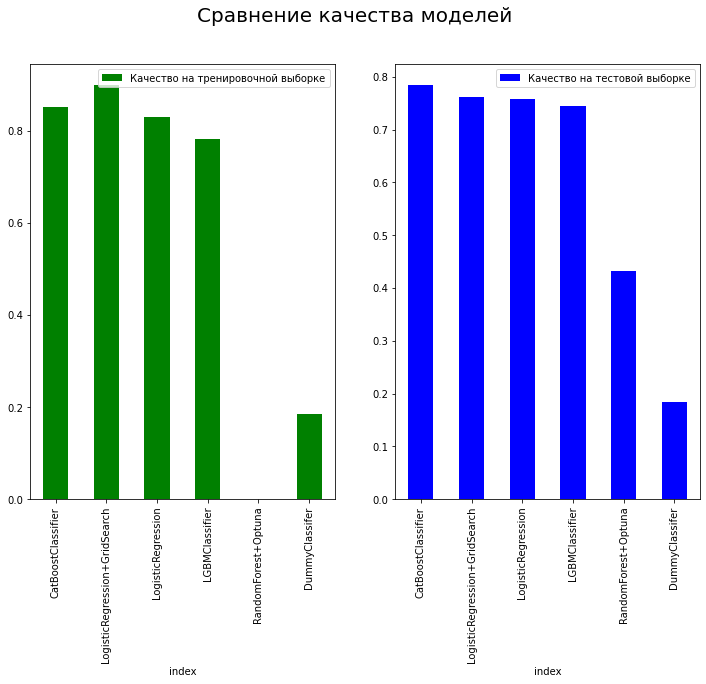

In [36]:
fig, axs = plt.subplots(1,2)

compare_models.plot(kind='bar', x='index', y= 'F1_train',color='green',figsize=(12, 8), label='Качество на тренировочной выборке',ax=axs[0])
compare_models.plot(kind='bar', x='index', y= 'F1_test',color='blue',figsize=(12, 8),  label='Качество на тестовой выборке', ax=axs[1])


fig.suptitle('Сравнение качества моделей',fontsize=20)

## Вывод

После предварительной обработки комментариев из представленного заказчиком  набор данных с разметкой о токсичности правок, были обучены несколько моделей. <br>
Худший результат у случайного леса. Наилучшим образом смогли классифицировать комментарии на позитивные и негативные модель логистичекой регресси (со стандартными параметрами и перебором параметров) и CatBost. Метрика кчества этих мелей превысила необходимый порог в 0.75. Указанные модели показали хороший результат несмотря на большой объём данных.<br>
Отмечу что лучший результат по классификации комментариев показала модель CatBoost, но наименьший уровень переобученности у логистической регрессии с перебором параметров. Предположу, что наилучшей ммоделью для реализации данного проекта будет именно этот алгоритм.<br>
